# The imaging equation
Our analysis of linear, shift-invariant imaging systems is built
around the following imaging equation:

$$g(x,y)={\mathrm{psf}}(x,y)**f(x,y),$$

where $f(x,y)$ is the object being imaged, ${\mathrm{psf}}(x,y)$
is the system point spread function, and $g(x,y)$ the image. The notation $**$
denotes the 2D convolutiuon. 

In the cell below, we will open an image, create a Gaussian PSF, and convolve them 
to create a noiseless blurred image.

Note that the Fourier convolution-multiplication theorem allows us to convert a convolution 
in the spatial domain into a multiplication in the frequency domain.  

$$G(\nu_{x},\nu_{y})={OTF}(\nu_{x},\nu_{y})F(\nu_{x},\nu_{y}).$$

Here $G(\nu_{x},\nu_{y})$ is the FT of $g(x,y)$, $F(\nu_{x},\nu_{y})$ is the FT of $f(x,y)$, and ${OTF}(\nu_{x},\nu_{y})$ is the FT of the PSF. OTF stands for Optical Transfer Function. 




<IPython.core.display.Javascript object>


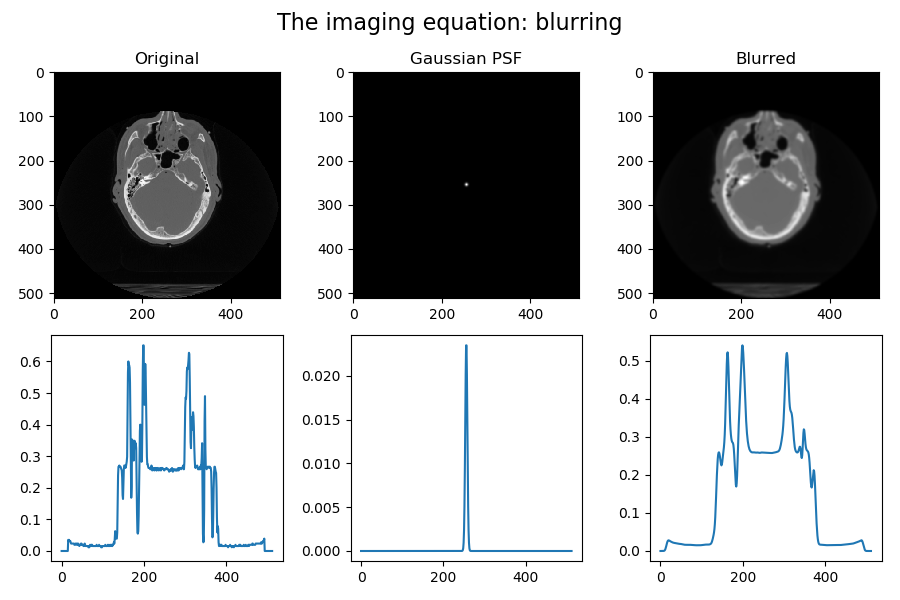

In [2]:
#First we will open an image and create a Gaussian PSF, then blur 

from ipywidgets import *
from scipy import ndimage
from scipy import signal
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)
import numpy as np
%matplotlib notebook
from matplotlib.image import imread
from numpy.fft  import fft2, ifft2, fftshift, ifftshift

def np_fftconvolve(A, B):
    return np.real(fftshift(ifft2(fft2(A)*fft2(B, s=A.shape))))

N=512

im = imread('c_vm1125.fre.png')[0:N,0:N].astype(np.float64)


# Calculate a Gaussian filter
sig = 0.01
x = np.linspace(-1, 1, im.shape[0])
y = np.linspace(-1, 1, im.shape[1])
xx, yy = np.meshgrid(x, y)
psf1 = np.zeros_like(im)
psf1 = (1.0/(sig*np.sqrt(2.0*np.pi))*np.exp(-(xx**2 + yy**2)/(2.0*sig**2))) 
#normalize
psf1 = psf1/np.sum(psf1)


#imfilt = signal.convolve2d(im, filt, boundary='symm', mode='same')
imfilt1 = np_fftconvolve(im, psf1)


fig, ax = plt.subplots(2, 3, figsize=(9,6))
fig.suptitle("The imaging equation: blurring", fontsize=16)

# Plot original
ax[0,0].imshow(im, cmap='gray')
ax[0,1].imshow(psf1,cmap='gray')
ax[0,2].imshow(imfilt1,cmap='gray')

ax[0,0].set_title('Original')
ax[0,1].set_title('Gaussian PSF')
ax[0,2].set_title('Blurred')

ax[1,0].plot(im[256,:])
ax[1,1].plot(psf1[256,:])
ax[1,2].plot(imfilt1[256,:])


fig.tight_layout()
fig.subplots_adjust(top=0.88)


# The imaging equation: To do 
Change the width of the Gaussian blur by changing the sig parameter. 

When you are done, set it back to 0.01.

Now we are going to think about undoing this blurring.

# The image restoration problem
If we know the ${\mathrm{psf}}(x,y)$, can't we always recover $f(x,y)$
from the image $g(x,y)$ by inverse filtering?

$$G(\nu_{x},\nu_{y})=\mathrm{OTF}(\nu_{x},\nu_{y})F(\nu_{x},\nu_{y})\,\,\,\Rightarrow\,\,\,F(\nu_{x},\nu_{y})=\mathrm{OTF}^{-1}(\nu_{x},\nu_{y})G(\nu_{x},\nu_{y}).$$

No, there are several problems:
* $\mathrm{OTF}^{-1}(\nu_{x},\nu_{y})$ may not exist. (Like when $\mathrm{OTF}(\nu_{x},\nu_{y})=0$.)
* If $\mathrm{OTF}^{-1}(\nu_{x},\nu_{y})$ exists, it may be ill-conditioned:
that is, a small perturbation in $g(x,y)$ could lead to a large perturbation
in the estimate of $f(x,y)$. In practice $g(x,y)$ is always contaminated
by small perturbations: noise! 




# The image restoration problem
Our imaging equation should really be

$$\mathbf{g}(x,y)={\mathrm{psf}}(x,y)**f(x,y)+{\mathbf{n}}(x,y)$$

Then we have 
$${F}^{(est)}(\nu_{x},\nu_{y})=\mathrm{OTF}^{-1}(\nu_{x},\nu_{y}){\mathbf{G}}(\nu_{x},\nu_{y})=F(\nu_{x},\nu_{y})+\frac{N(\nu_{x},\nu_{y})}{\mathrm{OTF}(\nu_{x},\nu_{y})}.$$

A problem having these characteristics is called ill-posed. We need to constrain or regularize the problem. 

# Pseudo-Inverse Filtering

If the inverse $\mathrm{OTF}^{-1}(\nu_{x},\nu_{y})$ simply doesn't
exist, another approach is to employ the pseudo-inverse. 
This emerges as the solution to the following problem:
$${\widehat{\mathbf{f}}}_{{\mathrm{Pseudo}}}(x)=\min_{f(x)}\int\left|{\mathbf{g}}(x)-{\mathrm{psf}}(x)*f(x)\right|^{2}\,dx\,\,{\mathrm{subject}\,\mathrm{to}}\,\,\left|f(x)\right|^{2}\,\,{\mathrm{is}\,\mathrm{minimum}}.$$

In Fourier space, this becomes

$${\widehat{\mathbf{F}}}_{{\mathrm{Pseudo}}}(\nu)=\min_{F(\nu)}\int\left|{\mathbf{G}}(\nu)-OTF(\nu)F(\nu)\right|^{2}\,d\nu\,\,{\mathrm{subject}\,\mathrm{to}}\,\,\left|F(\nu)\right|^{2}\,\,{\mathrm{is}\,\mathrm{minimum}}.$$

The solution is easily seen to be 

$${\widehat{\mathbf{F}}}_{{\mathrm{Pseudo}}}(\nu)=\left\{ \begin{array}{c}
OTF^{-1}(\nu){\mathbf{G}}(\nu)\,\,\,{\mathrm{when}}\,OTF(\nu)\neq0\\
0\,\,\,{\mathrm{when}}\,OTF(\nu)=0.
\end{array}\right.$$

Since $OTF(\nu)$ can be arbitrarily close to zero, while we have solved the existence problem, we haven't really
solved the ill-conditioning problem.


<IPython.core.display.Javascript object>


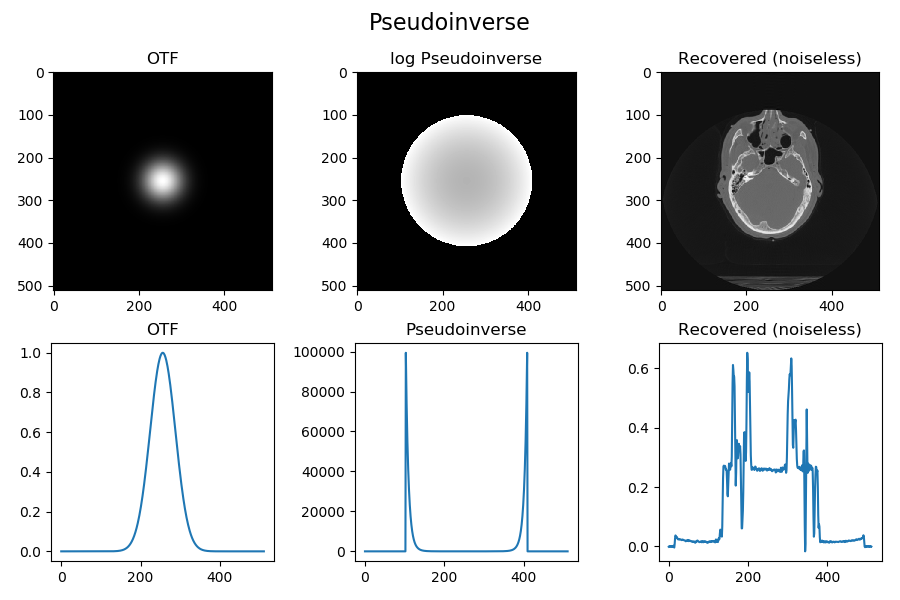

In [3]:
#Let's try a pseudoinverse filter on noiseless data

#Calcualte OTF with shifts for display
otfshift = fftshift(fft2(fftshift(psf1)))

#Caluclate without shifts for use in consoytrcuting pseudoinverse
otf = fft2(psf1)

thresh=0.00001

pseudoinv = np.zeros_like(otf)
pseudoinv[(np.abs(otf)>thresh).nonzero()]=1.0/otf[(np.abs(otf)>thresh).nonzero()]
#invotf=fftshift(invotf)

restorpseudo = np.real(fftshift(ifft2(fft2(imfilt1)*pseudoinv)))

fig, ax = plt.subplots(2, 3, figsize=(9,6))
fig.suptitle("Pseudoinverse", fontsize=16)
logpseudo = np.log(np.abs(pseudoinv+1e-12)) # Log transform (add small number to avoid underflow issues)

# Plot original
ax[0,0].imshow(np.abs(otfshift), cmap='gray')
ax[0,1].imshow(fftshift(logpseudo),cmap='gray')
ax[0,2].imshow(restorpseudo,cmap='gray')

shiftpseudo = fftshift(pseudoinv)

ax[1,0].plot(np.abs(otfshift[256,:]))
ax[1,1].plot(np.abs(shiftpseudo[256,:]))
ax[1,2].plot(restorpseudo[256,:])

ax[0,0].set_title('OTF')
ax[0,1].set_title('log Pseudoinverse')
ax[0,2].set_title('Recovered (noiseless)')

ax[1,0].set_title('OTF')
ax[1,1].set_title('Pseudoinverse')
ax[1,2].set_title('Recovered (noiseless)')

fig.tight_layout()
fig.subplots_adjust(top=0.88)

# Pseudoinverse: To do

Change the width of the Gaussian blur by changing the sig parameter in the first cell.

Now run this cell again and look at the OTF.

When you are done, set it back to 0.01.

In the next slide we are going to add noise and see what happens to the pseudoinverse. 

<IPython.core.display.Javascript object>


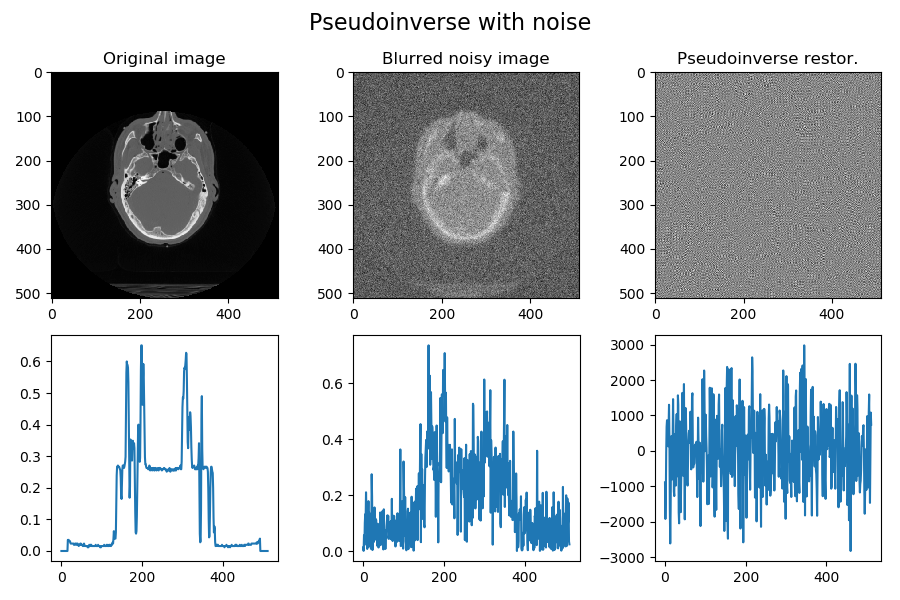

In [4]:
#Now let's add noise

noise_factor = 0.1

imfilt1noise = imfilt1 + np.random.normal(size=imfilt1.shape)*noise_factor

restor1noise = np.real(fftshift(ifft2(fft2(imfilt1noise)*pseudoinv)))

fig, ax = plt.subplots(2, 3, figsize=(9,6))
fig.suptitle("Pseudoinverse with noise", fontsize=16)


# Plot original
ax[0,0].imshow(im, cmap='gray')
ax[0,1].imshow(imfilt1noise,cmap='gray')
ax[0,2].imshow(restor1noise,cmap='gray')

ax[0,0].set_title('Original image')
ax[0,1].set_title('Blurred noisy image')
ax[0,2].set_title('Pseudoinverse restor.')

ax[1,0].plot(np.abs(im[256,:]))
ax[1,1].plot(np.abs(imfilt1noise[256,:]))
ax[1,2].plot(restor1noise[256,:])

fig.tight_layout()
fig.subplots_adjust(top=0.88)

# Tikhonov regularization

In analyzing problems of this kind, the Russian mathematician Tikhonov
proposed estimating the solution of the equation of interest by

$$\mathbf{f}_{{\mathrm{Tikhonov}}}(x)=\min_{f(x)}\int\left\{ \left|{\mathbf{g}}(x)-{\mathrm{psf}}(x)*f(x)\right|^{2}+\alpha\left|f(x)\right|^{2}\right\} \,dx,$$

or in the Fourier domain

$$\mathbf{F}_{{\mathrm{Tikhonov}}}(\nu)=\min_{F(\nu)}\int\left\{ \left|{\mathbf{G}}(\nu)-OTF(\nu)F(\nu)\right|^{2}+\alpha\left|F(\nu)\right|^{2}\right\} \,d\nu.$$

Here $\alpha>0$ is the regularization parameter. 

This equation can be solved by use of calculus of variations, yielding
$$\mathbf{F}_{{\mathrm{Tikhonov}}}(\nu)=\frac{OTF^{*}(\nu)}{\left|OTF(\nu)\right|^{2}+\alpha}{\mathbf{G}}(\nu).$$

Judicious choice of $\alpha$ allows the transition between these
two regions to occur near the point where the noise starts to become
large relative to the signal. 


<IPython.core.display.Javascript object>


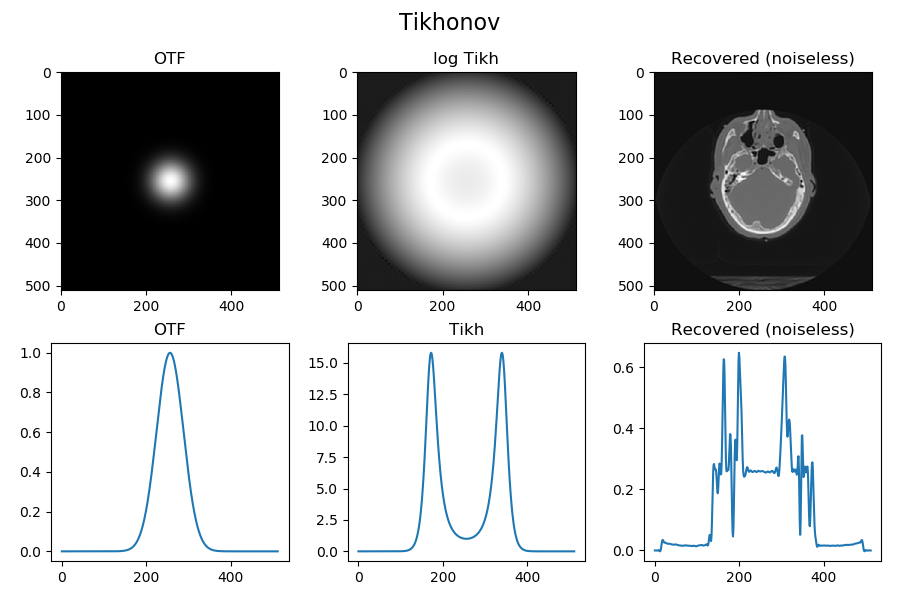

In [5]:
#Now try Tikhonov filter on noiseless data

alpha = 0.001
tikhonov = np.zeros_like(otf)
tikhonov=np.conj(otf)/((np.abs(otf))**2+alpha)
restortikhonov = np.real(fftshift(ifft2(fft2(imfilt1)*tikhonov)))

fig, ax = plt.subplots(2, 3, figsize=(9,6))
fig.suptitle("Tikhonov", fontsize=16)


logtikh = np.log(np.abs(tikhonov+1e-12)) # Log transform (add small number to avoid underflow issues)

# Plot original
ax[0,0].imshow(np.abs(otfshift), cmap='gray')
ax[0,1].imshow(fftshift(logtikh),cmap='gray')
ax[0,2].imshow(restortikhonov,cmap='gray')

shifttikh = fftshift(tikhonov)

ax[1,0].plot(np.abs(otfshift[256,:]))
ax[1,1].plot(np.abs(shifttikh[256,:]))
ax[1,2].plot(restortikhonov[256,:])

ax[0,0].set_title('OTF')
ax[0,1].set_title('log Tikh')
ax[0,2].set_title('Recovered (noiseless)')

ax[1,0].set_title('OTF')
ax[1,1].set_title('Tikh')
ax[1,2].set_title('Recovered (noiseless)')
fig.tight_layout()
fig.subplots_adjust(top=0.88)



<IPython.core.display.Javascript object>


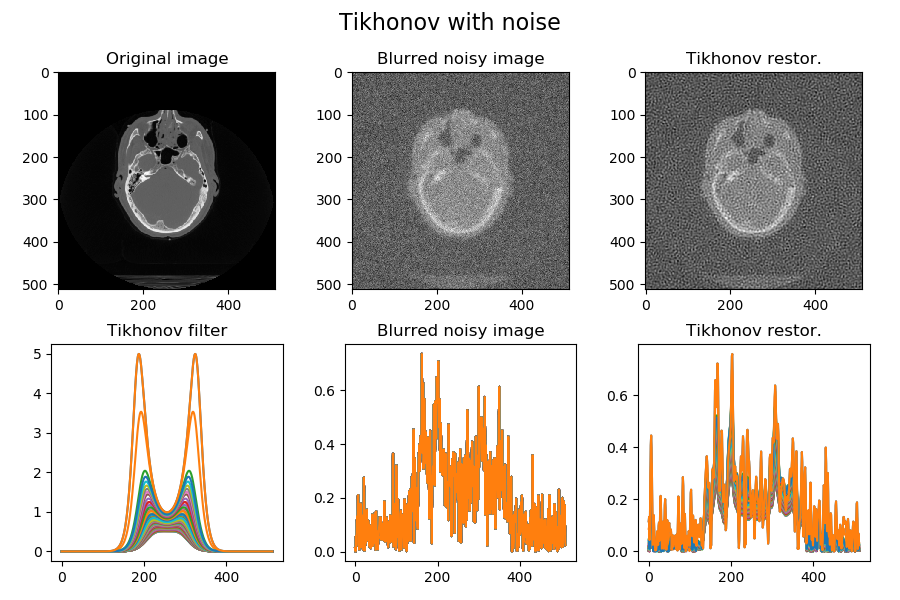

interactive(children=(FloatSlider(value=0.01, description='alpha', max=1.0, min=0.01, step=0.01), Output()), _…

In [6]:
#Now try Tikhonov filter

tikhonov = np.zeros_like(otf)

fig, ax = plt.subplots(2, 3, figsize=(9,6))
fig.suptitle("Tikhonov with noise", fontsize=16)

# Plot original
ax[0,0].imshow(im, cmap='gray')
ax[0,1].imshow(imfilt1noise,cmap='gray')

ax[0,0].set_title('Original image')
ax[0,1].set_title('Blurred noisy image')
ax[0,2].set_title('Tikhonov restor.')

ax[1,0].set_title('Tikhonov filter')
ax[1,1].set_title('Blurred noisy image')
ax[1,2].set_title('Tikhonov restor.')

# Make an updating function
def update(alpha = 0.01):
    tikhonov=np.conj(otf)/((np.abs(otf))**2+alpha)
    shifttikh = fftshift(tikhonov)
    restortikhonov = np.real(fftshift(ifft2(fft2(imfilt1noise)*tikhonov)))
    ax[0,2].imshow(restortikhonov, cmap='gray')
    ax[1,0].plot((np.abs(shifttikh[256,:])))
    ax[1,1].plot((np.abs(imfilt1noise[256,:]))) 
    ax[1,2].plot((np.abs(restortikhonov[256,:])))


fig.tight_layout()
fig.subplots_adjust(top=0.88)
# Add an interactive widget
interact(update, alpha=(0.01,1.0,0.01));

# Tikhonov: To do

Play around with the slider to adjust the Tikhonov parameter.

Go back to the cell that says Now let's add noise and change the noise factor.

When you are done, set the noise factor back to 0.1. 

# Gradient regularization

We can change the regularization term in a Tikhovov style set up to penalize the L2 norm of the image gradient, which discourages rapid variation in the image

$$\mathbf{f}_{{\mathrm{grad}}}(x)=\min_{f(x)}\int\left\{ \left|{\mathbf{g}}(x)-{\mathrm{psf}}(x)*f(x)\right|^{2}+\alpha\left|\nabla f(x)\right|^{2}\right\} \,dx,$$

or in the Fourier domain

$$\mathbf{F}_{{\mathrm{grad}}}(\nu)=\min_{F(\nu)}\int\left\{ \left|{\mathbf{G}}(\nu)-OTF(\nu)F(\nu)\right|^{2}+\alpha\nu^2\left|F(\nu)\right|^{2}\right\} \,d\nu.$$

Here $\alpha>0$ is the regularization parameter. 

This equation can be solved by use of calculus of variations, yielding
$$\mathbf{F}_{{\mathrm{grad}}}(\nu)=\frac{OTF^{*}(\nu)}{\left|OTF(\nu)\right|^{2}+\alpha\nu^2}{\mathbf{G}}(\nu).$$

<IPython.core.display.Javascript object>


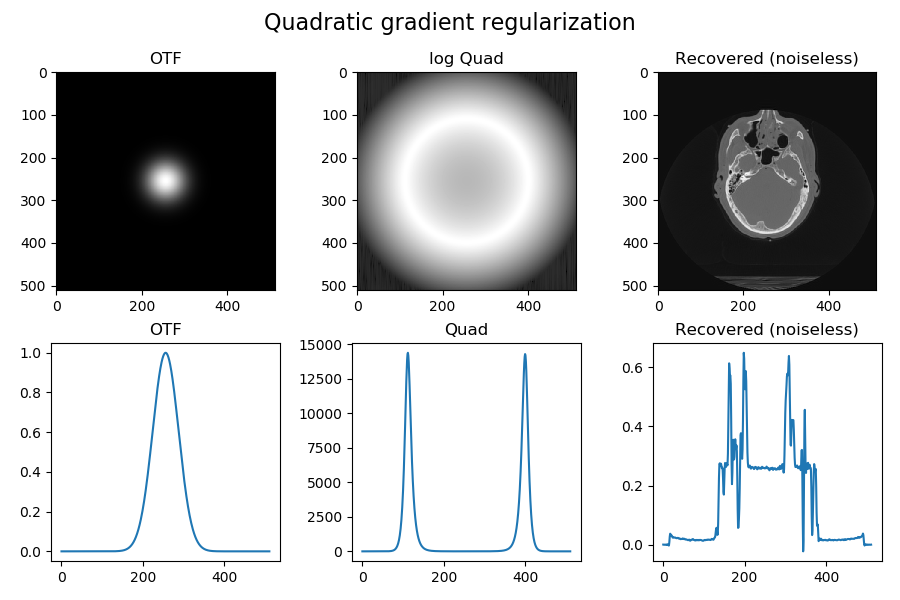

In [7]:
#Now try quadratically regularized filter gradient filter

alpha = 0.001
vmax = 1.0/N

# Calculate filter
vx = vmax*np.linspace(-1, 1, im.shape[0])
vy = vmax*np.linspace(-1, 1, im.shape[1])
vx2, vy2 = np.meshgrid(vx, vy)

quad = np.zeros_like(otf)
imfreq = fftshift(vx2**2+vy2**2)

quad=np.conj(otf)/((np.abs(otf))**2+alpha*imfreq)
restorquad = np.real(fftshift(ifft2(fft2(imfilt1)*quad)))

fig, ax = plt.subplots(2, 3, figsize=(9,6))
fig.suptitle("Quadratic gradient regularization", fontsize=16)
logquad = np.log(np.abs(quad+1e-12)) # Log transform (add small number to avoid underflow issues)

# Plot original
ax[0,0].imshow(np.abs(otfshift), cmap='gray')
ax[0,1].imshow(fftshift(logquad),cmap='gray')
ax[0,2].imshow(restorquad,cmap='gray')

shiftquad = fftshift(quad)

ax[1,0].plot(np.abs(otfshift[256,:]))
ax[1,1].plot(np.abs(shiftquad[256,:]))
ax[1,2].plot(restorquad[256,:])

ax[0,0].set_title('OTF')
ax[0,1].set_title('log Quad')
ax[0,2].set_title('Recovered (noiseless)')

ax[1,0].set_title('OTF')
ax[1,1].set_title('Quad')
ax[1,2].set_title('Recovered (noiseless)')
fig.tight_layout()
fig.subplots_adjust(top=0.88)



<IPython.core.display.Javascript object>


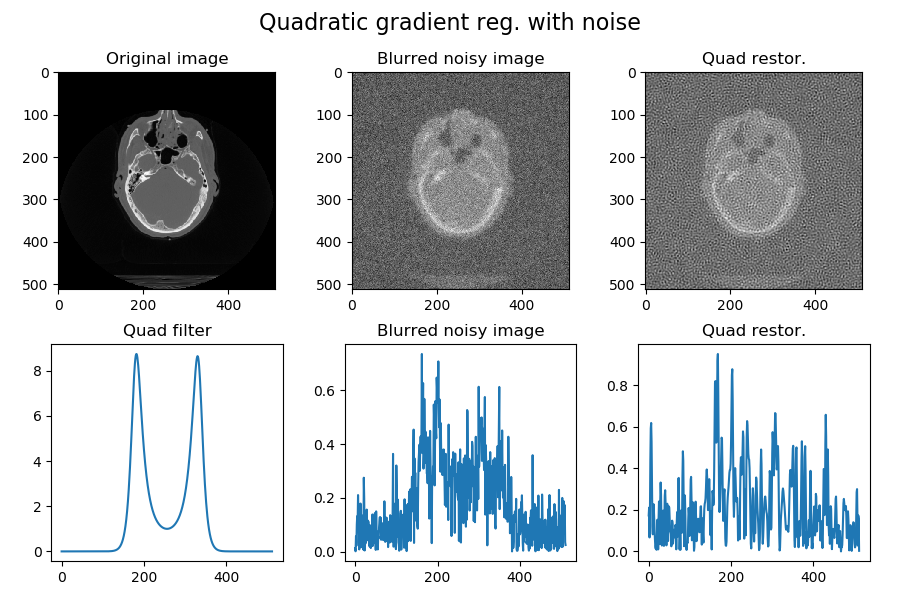

interactive(children=(IntSlider(value=10000, description='alpha', max=250000, min=10000, step=10000), Output()…

In [8]:
#Now try quad filter

quad = np.zeros_like(otf)

fig, ax = plt.subplots(2, 3, figsize=(9,6))
fig.suptitle("Quadratic gradient reg. with noise", fontsize=16)

# Plot original
ax[0,0].imshow(im, cmap='gray')
ax[0,1].imshow(imfilt1noise,cmap='gray')

ax[0,0].set_title('Original image')
ax[0,1].set_title('Blurred noisy image')
ax[0,2].set_title('Quad restor.')

ax[1,0].set_title('Quad filter')
ax[1,1].set_title('Blurred noisy image')
ax[1,2].set_title('Quad restor.')

# Make an updating function
def update(alpha = 100):
    quad=np.conj(otf)/((np.abs(otf))**2+alpha*imfreq)
    shiftquad=fftshift(quad)
    restorquad = np.real(fftshift(ifft2(fft2(imfilt1noise)*quad)))
    ax[0,2].imshow(restorquad, cmap='gray')
    ax[1,0].plot((np.abs(shiftquad[256,:])))
    ax[1,1].plot((np.abs(imfilt1noise[256,:]))) 
    ax[1,2].plot((np.abs(restorquad[256,:])))

fig.tight_layout()
fig.subplots_adjust(top=0.88)
# Add an interactive widget
interact(update, alpha=(10000,250000,10000));

# Gradient regularizer: To do

Play around with the slider to adjust the Tikhonov parameter.

Go back to the cell that says Now let's add noise and change the noise factor.

When you are done, set the noise factor back to 0.1.

# Richardson-Lucy deconvolution (aka Maximum likelihood expectation maximimation deconvolution
All of the previous filters we derived were analytical, one-shot linear filters. In this cell we will consider an iterative deconvolution method. 

We need to represent the measured data as a vector $\mathbf{g}$ assumed to contain $M$ elements and the desired image
$f$ as a vector $\mathbf{f}$ assumed to contain $N$ elements. The two vectors are linked by a $M\times N$ system matrix $H$ that maps the desired image to the measured data. Implicitly then our discrete imaging equation is 

$$\mathbf{g} = H \mathbf{f} + \mathbf{n}$$

where $\mathbf{n}$ is a vector of noise. 



# Richardson-Lucy deconvolution (aka Maximum likelihood expectation maximimation deconvolution

The Richardson Lucy update is given by

$$f_{n}^{(k+1)}=f_{n}^{(k)}\frac{1}{s_{n}}\sum_{i=0}^{M-1}\frac{g_{m}}{\left(H\boldsymbol{f}^{(k)}\right)_{m}}H_{mn}$$

where $s_{n}$ is a sensitivity term. 

$$s_{n}=\sum_{m=0}^{M}H_{mn}$$

This expression says: apply the matrix $H$ to the latest guess of the image $\boldsymbol{f}^{(k)}$ and divide the resulting estimate of the data into the actually measured data. The remaining sum over $m$ with the term $H_{mn}$ maps
the resulting correction back into image space. In tomography this operation is a backprojection. In deconvolution it is equivalent to convolving the correction factor with a flipped version of the PSF.




# Richardson-Lucy deconvolution for shift-invariant case
In the case of convolution with a normalized PSF (one that sums to 1), the matrix products are themselves equivalent to convolutions and the sensitivity term can be dropped because it is one. 

So returning to our conitnuous notation, we can write

$$f^{(k+1)}\left(x,y\right)=f^{(k)}\left(x,y\right)\left[\left(\frac{g(x,y)}{f^{(k)}\left(x,y\right)}\right)**psf^{T}(x,y)\right]$$


here $psf^{T}(x,y)$ denotes a flipped PSF. The flipping is not necessary if the PSF is symmetric. 

<IPython.core.display.Javascript object>


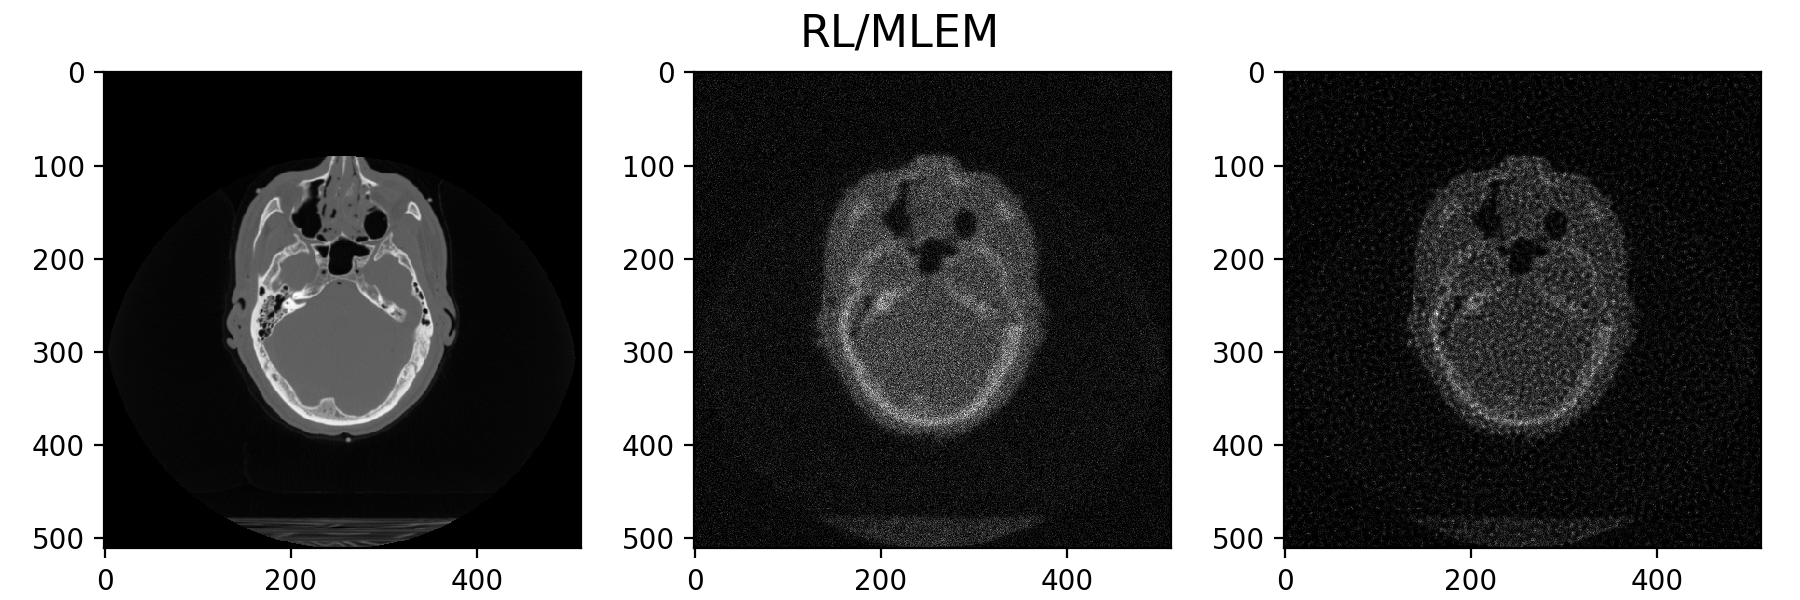

0.9999999999999999


In [29]:
#Try Poisson noise and MLEM

noise_level = 20

impoisson = np.random.poisson(imfilt1*noise_level+1)

fig, ax = plt.subplots(1, 3, figsize=(9,3))
fig.suptitle("RL/MLEM", fontsize=16)

# Plot original
ax[0].imshow(im, cmap='gray')
ax[1].imshow(impoisson,cmap='gray')

num_iters = 20

print(np.sum(psf1))

imiter = impoisson

for i in range(0,num_iters-1,1):
    #convolve latest guess with psf
    imblur = np_fftconvolve(imiter, psf1)
    #take ratio of the two
    ratio = impoisson/imblur
    #correction factor obtained by convolving ratio with flipped psf (flip not needed for symmetric PDF)
    corr = np_fftconvolve(ratio, psf1)
    #update is multiplaicate
    imiter = imiter * corr
    
ax[2].imshow(imiter,cmap='gray')

fig.tight_layout()
fig.subplots_adjust(top=0.88)

# RL deconvolution: To do
    
Change the number of iterations

Change the noise level 